# FBA QUANT Financial Engineering HW 8
KimSooWan(hse07088@snu.ac.kr)
***

In [66]:
import pandas as pd
import numpy as np
import math
from scipy.stats import norm

### Problem 1. 
Suppose you are a portfolio manager and you are going to use derivatives to construct a certain portfolio. The current stock price for AAPL is $171.01 per share, at 10 am, March 8, 2019. You want to sell 1 unit of European Call on AAPL, with a strike of $180 and maturity of 1 year. Suppose the annualized interest rate is 3\%, the annualized drift for AAPL is 5\%, no dividend, and the annualized volatility is 10\%. In order to hedge the potential risk of your option, you are going to calculate several Greeks based on the Black-Merton-Scholes model.

(a) Calculate the Call option price, at 10 am, March 8, 2019.

(b) Calculate the Delta ($\Delta$), Gamma ($\Gamma$), Vega ($\nu$), and Theta ($\Theta$) at 10 am, March 8, 2019. Also, give your thoughts about why Delta is positive or negative.

(c) Suppose you are doing a monthly Delta-Hedge, that is, you re-hedge per month. After one month, at 10 am, April 8, 2019, the stock price is $180.2, and you want to re-hedge right now. Calculate the additional amount of shares of AAPL you should buy (positive for buying, negative for selling) at 10 am, April 8, 2019, in order to re-hedge. Also, give your thoughts about why you are selling or buying stocks when the stock price goes up from the meaning of Delta Hedging.

(d) Calculate the change of your portfolio value (i.e., the net cashflow). Note that your answer should be in $ with the new portfolio value minus the previous value, in present value at 10 am, April 8, 2019.


In [67]:
def bs_call_option_price(S0, K, T, sigma, r_f, dividend_yield = 0):
    d1 = (math.log(S0/K)+(r_f - dividend_yield + sigma*sigma/2)*T)/sigma/math.sqrt(T)
    d2 = d1 - sigma*math.sqrt(T)
    C = S0*math.exp(-dividend_yield*T)*norm.cdf(d1) - K*math.exp(-r_f*T)*norm.cdf(d2)
    return C

def bs_call_delta(S0, K, T, sigma, r_f, dividend_yield = 0):
    d1 = (math.log(S0/K)+(r_f - dividend_yield + sigma*sigma/2)*T)/sigma/math.sqrt(T)
    delta = math.exp(-dividend_yield*T)*norm.cdf(d1)
    return delta

def bs_call_gamma(S0, K, T, sigma, r_f, dividend_yield = 0):
    d1 = (math.log(S0/K)+(r_f - dividend_yield + sigma*sigma/2)*T)/sigma/math.sqrt(T)
    return math.exp(-dividend_yield*T)*norm.pdf(d1)/sigma/S0/math.sqrt(T)

def bs_call_vega(S0, K, T, sigma, r_f, dividend_yield = 0):
    d1 = (math.log(S0/K)+(r_f - dividend_yield + sigma*sigma/2)*T)/sigma/math.sqrt(T)
    return math.exp(-dividend_yield*T)*norm.pdf(d1)*S0*math.sqrt(T)

def bs_call_theta(S0, K, T, sigma, r_f, dividend_yield = 0):
    d1 = (math.log(S0/K)+(r_f - dividend_yield + sigma*sigma/2)*T)/sigma/math.sqrt(T)
    d2 = d1 - sigma*math.sqrt(T)
    term1 = -math.exp(-dividend_yield*T)*norm.pdf(d1)*S0*sigma/2/math.sqrt(T)
    term2 = dividend_yield*math.exp(-dividend_yield*T)*S0*norm.cdf(d1)
    term3 = r_f*K*math.exp(-r_f*T)*norm.cdf(d2)
    return term1+term2-term3

In [68]:
#(a)

S0 = 171.01
K = 180
T = 1
sigma = 0.1
r_f = 0.03
dividend_yield = -0.05 # Note that annualized drift of the stock price is effectively equivalanet to the negative dividend for call option holder

current_option_price = bs_call_option_price(S0, K, T, sigma, r_f, dividend_yield)
print(current_option_price)

9.906435052992578


In [69]:
#(b)

current_delta = bs_call_delta(S0, K, T, sigma, r_f, dividend_yield)
print("Delta : ", current_delta)
print("Gamma : ", bs_call_gamma(S0, K, T, sigma, r_f, dividend_yield))
print("Vega : ", bs_call_vega(S0, K, T, sigma, r_f, dividend_yield))
print("Theta : ", bs_call_theta(S0, K, T, sigma, r_f, dividend_yield))

Delta :  0.6646001436570173
Gamma :  0.023165762255911843
Vega :  67.74692833486097
Theta :  -12.182415010496191


In [70]:
d = 0.0000001
print("Delta : ", (bs_call_option_price(S0+d, K, T, sigma, r_f, dividend_yield)-bs_call_option_price(S0, K, T, sigma, r_f, dividend_yield))/d)
print("Gamma : ", (bs_call_delta(S0+d, K, T, sigma, r_f, dividend_yield)-bs_call_delta(S0, K, T, sigma, r_f, dividend_yield))/d)
print("Vega : ", (bs_call_option_price(S0, K, T, sigma+d, r_f, dividend_yield)-bs_call_option_price(S0, K, T, sigma, r_f, dividend_yield))/d)
print("Theta : ", -(bs_call_option_price(S0, K, T+d, sigma, r_f, dividend_yield)-bs_call_option_price(S0, K, T, sigma, r_f, dividend_yield))/d)

Delta :  0.6646001793342293
Gamma :  0.023165759310828093
Vega :  67.74693105171536
Theta :  -12.182415076722464


It is common for the delta of a call option to range between 0, 1, since call options benefits from the higher underlying asset price.

In [ ]:
#(c)

S1m = 180.2
new_delta = bs_call_delta(S1m, K, T-1/12, sigma, r_f, dividend_yield)
print("Old Delta : ", current_delta)
print("New Delta : ", new_delta)
print("Delta-Hedge Rebalancing : ", -current_delta+new_delta, "stocks (since I am shorting the call)")

Old Delta :  0.6646001436570173
New Delta :  0.832736722519205
Delta-Hedge Rebalancing :  0.1681365788621878 stocks (since i am shorting the call)


Due to the positive gamma, i.e., the convexity of the option price with respect to the underlying asset price, as the underlying asset price increases, the delta of the option also increases. Thus, for those who are shorting the option, they should buy the underlying asset to delta-hedge the option position when the price increases. It is important to note that, in problem (c), one should take into account the effects of both gamma and theta. Estimating the effect of theta can be somewhat ambiguous due to trade-off terms that may result in both benefits and losses as time passes.

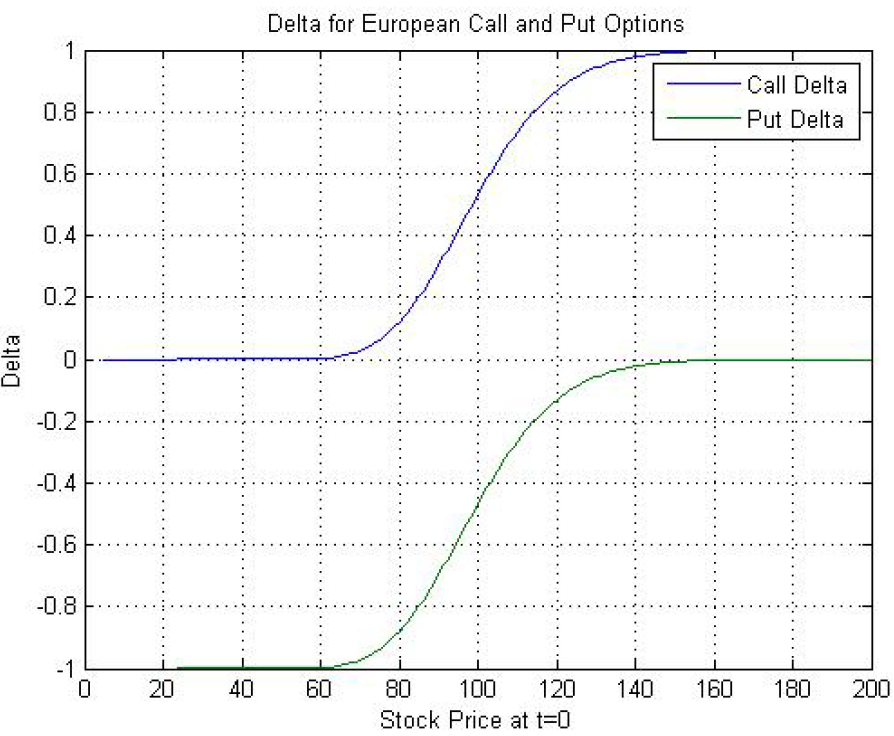

In [72]:
#(d)

initial_port_value = - current_option_price + current_delta * S0
print("Initial Delta-hedged Portfolio Value : ", initial_port_value)
new_option_price = bs_call_option_price(S1m, K, T-1/12, sigma, r_f, dividend_yield)
new_port_value = - new_option_price + current_delta * S1m
print("After 1m Portfolio Value : ", new_port_value)
print("Profit : ", new_port_value-initial_port_value)

Initial Delta-hedged Portfolio Value :  103.74683551379394
After 1m Portfolio Value :  104.05254782771917
Profit :  0.3057123139252269


Note that the delta-hedged position of a short option will always benefit from the price change of underlying assets (either upward or downward).

***
### Problem 2.
Assume the same situation as Problem 1. Back to at 10 am, March 8, 2019. Suppose you are constructing another portfolio by buying a European Call on AAPL with strike $180 and selling the European Call on AAPL with strike $185.

(a) Without volatility skew, that is, volatility is always 10% for different strikes. Calculate your portfolio value $V$, at 10 am, March 8, 2019.

(b) Suppose the market actually has a volatility skew: $\sigma(K) = \min\{1, 18K^{-1}\}$. Calculate your portfolio $V'$ again, at 10 am, March 8, 2019. Also, give your thoughts about why the portfolio value goes higher or lower after we assume the volatility skew in the market.

In [73]:
#(a) Constant sigma

K1 = 180
K2 = 185
K1_bs_call_price = bs_call_option_price(S0, K1, T, sigma, r_f, dividend_yield)
K2_bs_call_price = bs_call_option_price(S0, K2, T, sigma, r_f, dividend_yield)
print("Call Option Price With Strike $180 : ", K1_bs_call_price)
print("Call Option Price With Strike $185 : ", K2_bs_call_price)
bs_bullish_call_spread_value = K1_bs_call_price - K2_bs_call_price
print("Portfolio Value : ", bs_bullish_call_spread_value)

Call Option Price With Strike $180 :  9.906435052992578
Call Option Price With Strike $185 :  7.28760947122646
Portfolio Value :  2.6188255817661172


In [74]:
#(b) with volatility skew

def get_sigma(K):
    return min(1, 18/K)

K1_mkt_call_price = bs_call_option_price(S0, K1, T, get_sigma(K1), r_f, dividend_yield)
K2_mkt_call_price = bs_call_option_price(S0, K2, T, get_sigma(K2), r_f, dividend_yield)
print("Considering Market Volatility Skew")
print("Call Option Price With Strike $180 : ", K1_mkt_call_price)
print("Call Option Price With Strike $185 : ", K2_mkt_call_price)
mkt_bullish_call_spread_value = K1_mkt_call_price - K2_mkt_call_price
print("Portfolio Value : ", mkt_bullish_call_spread_value)

Considering Market Volatility Skew
Call Option Price With Strike $180 :  9.906435052992578
Call Option Price With Strike $185 :  7.094155379813984
Portfolio Value :  2.812279673178594


The volatility skew is commonly observed as the implied volatility (IV) of calls with low strikes being higher than that of calls with higher strikes. Thus, since vega of basic options is always positive, the price of the option with a lower strike will be undervalued while the options with higher strikes will be overvalued, assuming ideal circumstances of constant volatility across the strike and time. A bullish call spread involves going long on the call with the lower strike and shorting the call with the higher strike. Consequently, when the volatility skew is ignored, the portfolio tends to be undervalued.

***
### Problem 3.
Assume the same situation as Problem 1. Now you are focusing on portfolios with digital options on AAPL, at 10 am, March 8, 2019. All the information about the stock stays the same, and we are back to a world of constant volatility 10% again.

(a) Note that the payoff of this option at maturity is: $1_{\{S_T \geq K\}}$. Calculate the price of a digital call option on AAPL with a strike of 180 and maturity of 1 year, at 10 am, March 8, 2019. Also, give your thoughts about the proper range for the digital option's price, from the Put-Call Parity. And compare this number with the Delta of the European Call in Problem 1.

(b) Suppose you are going to sell this digital option at the price you calculated in part (a). Meanwhile, you want to do Delta-Hedging to lower potential risk. Calculate the amount of shares of AAPL you should buy or sell (positive for buying, negative for selling), based on the Black-Scholes model, at 10 am, March 8, 2019. Again, compare this number with the Gamma of the European Call in Problem 1.

(c) Suppose you are constructing another portfolio by buying a digital European Call on AAPL with a strike of 180 and selling a digital European Call on AAPL with a strike of 185. Calculate your portfolio value $W$, at 10 am, March 8, 2019.

(d) Now, we assume the market has a volatility skew: $\sigma(K) = \min\{1, 18K^{-1}\}$. Calculate your portfolio $W'$ again, at 10 am, March 8, 2019. And compare the difference of portfolio value $W' - W$ with the previous one $V' - V$ in Problem 2. Also, give your thoughts about the impact of the volatility skew on different portfolios.

Note that here we should use the pricing formula based on the chain rule: $C_{Digital}(K) = -\frac{dC(K, \sigma(K))}{dK} = -\frac{\partial C(K, \sigma(K))}{\partial K} - \frac{\partial C(K, \sigma(K))}{\partial \sigma} \cdot \frac{\partial \sigma(K)}{\partial K}$.


In [75]:
# Based on the Black-Scholes model and assuming constant volatility across the time and strike, the pricing of the digital option is as follows.
# Note that $N(d_2)$ represents the risk-neutral probability of $S_T$ finishing in the money.

def bs_digital_call_price(S0, K, M, T, sigma, r_f, dividend_yield = 0): 
    d1 = (math.log(S0/K)+(r_f - dividend_yield + sigma*sigma/2)*T)/sigma/math.sqrt(T)
    d2 = d1 - sigma*math.sqrt(T)
    digital_call = math.exp(-r_f*T)*M*norm.cdf(d2)
    return digital_call

def bs_digital_call_delta(S0, K, M, T, sigma, r_f, dividend_yield = 0): 
    d1 = (math.log(S0/K)+(r_f - dividend_yield + sigma*sigma/2)*T)/sigma/math.sqrt(T)
    d2 = d1 - sigma*math.sqrt(T)
    return math.exp(-r_f*T)*M*norm.pdf(d2)/sigma/math.sqrt(T)/S0

In [76]:
#(a)

M = 1
print("Digital Call Option Price : ",bs_digital_call_price(S0, K, M, T, sigma, r_f, dividend_yield))

Digital Call Option Price :  0.5763713084099663


Put-Call parity of the digital option is as follows : $C_{digital} + P_{digital} = PV(\$M) = Me^{-r_fT} = \$0.97045$.

Thus, digital call price should range between (0, 0.97045).

In [77]:
# (b)

print("Digital Call Option Delta : ", bs_digital_call_delta(S0, K, M, T, sigma, r_f, dividend_yield))

Digital Call Option Delta :  0.022008761129908246


In [78]:
print("Digital Call Option Delta : ", (bs_digital_call_price(S0+d, K, M, T, sigma, r_f, dividend_yield)-bs_digital_call_price(S0, K, M, T, sigma, r_f, dividend_yield))/d)

Digital Call Option Delta :  0.02200875814928338


Thus, to delta-hedge the shorting of digital call option, one should buy 0.02201 shares of the underlying stocks. 

In [79]:
# (c)

K1_bs_digital_call_price = bs_digital_call_price(S0, K1, M, T, sigma, r_f, dividend_yield)
K2_bs_digital_call_price = bs_digital_call_price(S0, K2, M, T, sigma, r_f, dividend_yield)
print("Digital Call Option Price With Strike $180 : ", K1_bs_digital_call_price)
print("Digital Call Option Price With Strike $185 : ", K2_bs_digital_call_price)
bs_digital_portfolio_value = K1_bs_digital_call_price - K2_bs_digital_call_price
print("Portfolio Value : ", bs_digital_portfolio_value)

Digital Call Option Price With Strike $180 :  0.5763713084099663
Digital Call Option Price With Strike $185 :  0.47115757757956406
Portfolio Value :  0.10521373083040225


In [80]:
# (d)

# Considering the volatility skew of the market, ditial call option is as follows.
def mkt_digital_call_price(skew, S0, K, M, T, sigma, r_f, dividend_yield = 0): 
    bs_price = bs_digital_call_price(S0, K, M, T, sigma, r_f, dividend_yield)
    skew_adjustment = - bs_call_vega(S0, K, T, sigma, r_f, dividend_yield)*skew
    return bs_price + skew_adjustment

# Market Volatility Skew given in the problem.
def skew(K):
    return -18/K**2

K1_mkt_digital_call_price = mkt_digital_call_price(skew(K1), S0, K1, M, T, sigma, r_f, dividend_yield)
K2_mkt_digital_call_price = mkt_digital_call_price(skew(K2), S0, K2, M, T, sigma, r_f, dividend_yield)
print("Considering Market Volatility Skew")
print("Digital Call Option Price With Strike $180 : ", K1_mkt_digital_call_price)
print("Digital Call Option Price With Strike $185 : ", K2_mkt_digital_call_price)
mkt_digital_portfolio_value = K1_mkt_digital_call_price - K2_mkt_digital_call_price
print("Portfolio Value : ", mkt_digital_portfolio_value)

Considering Market Volatility Skew
Digital Call Option Price With Strike $180 :  0.6140084908182224
Digital Call Option Price With Strike $185 :  0.5088015353368763
Portfolio Value :  0.10520695548134607


In [93]:
print("V'-V = ", mkt_bullish_call_spread_value - bs_bullish_call_spread_value)
print("W'-W = ", mkt_digital_portfolio_value - bs_digital_portfolio_value)

V'-V =  0.19345409141247671
W'-W =  -6.775349056187263e-06
